In [131]:
# Import the libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [132]:
cyberAttacks = pd.read_csv('/Users/shoggyboy/Desktop/Lboro/S2_AdvancedProg/individual_cw/cyberThreats.csv')

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [134]:
cyberAttacks.head(5)

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [135]:
cyberAttacks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


# ML Pipeline:
- Target Variable
    - Financial Loss (in Million $) is an excellent regression target.

- Numeric Features
    - Year
    - Number of Affected Users
    - Incident Resolution Time (in Hours)

- Categorical Features
    - Country
    - Attack Type
    - Target Industry
    - Attack Source
    - Security Vulnerability Type
    - Defense Mechanism Used



# Trying a simple Linear Regression

In [136]:
# Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
# Define target and drop missing
target = "Financial Loss (in Million $)"
define_target = cyberAttacks.dropna(subset=[target])
X = define_target.drop(columns=[target])
y = define_target[target]

In [138]:
# Log-transform target to reduce skewness
y_log = np.log1p(y)

In [139]:
# Define categorical and numeric features
categorical_features = [
    "Country",
    "Attack Type",
    "Target Industry",
    "Attack Source",
    "Security Vulnerability Type",
    "Defense Mechanism Used"
]
numeric_features = [
    "Year",
    "Number of Affected Users",
    "Incident Resolution Time (in Hours)"
]

In [140]:
# Preprocessing steps
numeric_transformer = SimpleImputer(strategy="median")
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features),
])

# Linear regression model pipeline
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])


In [141]:
# Split data
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

In [142]:
# Train model
model.fit(X_train, y_train_log)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Year',
                                                   'Number of Affected Users',
                                                   'Incident Resolution Time '
                                                   '(in Hours)']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Country', 'Attack Type',
                                                   'Target Industry',
                                                   'Attack Source',
                                                   'Security Vulnerability '
                                                   'Type',
                                                   'Defense Mechanism '
                                                   'Used'])])),
                ('regressor', LinearRegression())])

In [143]:
# Predict and inverse transform
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test = np.expm1(y_test_log)

In [144]:
# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (original scale): {mse:.2f}")
print(f"R^2 Score (original scale): {r2:.2f}")

Mean Squared Error (original scale): 952.80
R^2 Score (original scale): -0.18


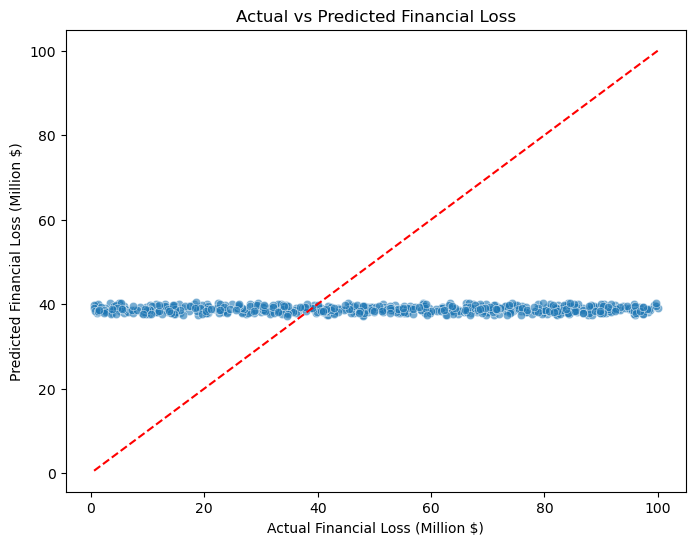

In [145]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Financial Loss (Million $)")
plt.ylabel("Predicted Financial Loss (Million $)")
plt.title("Actual vs Predicted Financial Loss")
plt.show()

# R² is  negative, it means linear regression doesn't explain the variance well.

In [146]:
# Define the model pipeline
rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),  # same preprocessor as before
    ("regressor", RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        max_depth=None,
        n_jobs=-1
    ))
])

In [147]:
# Train the model
rf_pipeline.fit(X_train, y_train_log)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Year',
                                                   'Number of Affected Users',
                                                   'Incident Resolution Time '
                                                   '(in Hours)']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Country', 'Attack Type',
                                                   'Target Industry',
                                                   'Attack Source',
                                                   'Security Vulnerability '
                                                   'Type',
                                                   'Defense Mechanism '
                                                   'Used'])])),
                ('regressor',
                 RandomForestRegressor(n_jobs=-1, random_state=42))])

In [148]:
# Predict
y_pred_log_rf = rf_pipeline.predict(X_test)
y_pred_rf = np.expm1(y_pred_log_rf)
y_test_original = np.expm1(y_test_log)

In [149]:
# Evaluate
mse_rf = mean_squared_error(y_test_original, y_pred_rf)
r2_rf = r2_score(y_test_original, y_pred_rf)

In [150]:

print(f"🌲 Random Forest MSE: {mse_rf:.2f}")
print(f"🌲 Random Forest R² Score: {r2_rf:.2f}")

🌲 Random Forest MSE: 1050.92
🌲 Random Forest R² Score: -0.30


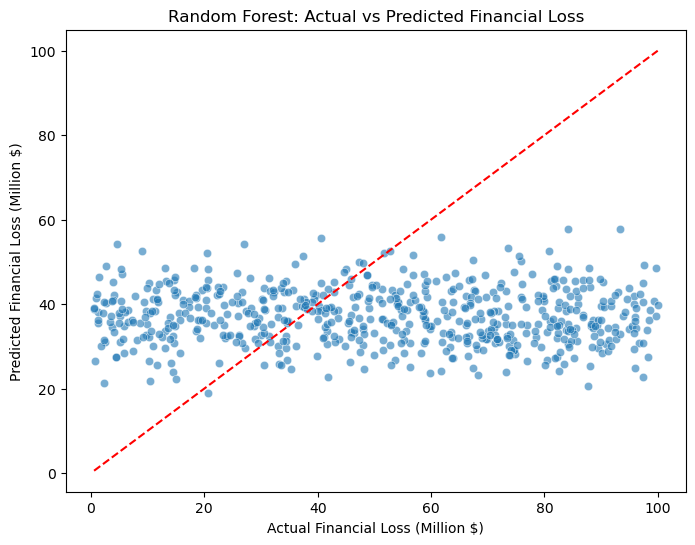

In [151]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_original, y=y_pred_rf, alpha=0.6)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()], 'r--')
plt.xlabel("Actual Financial Loss (Million $)")
plt.ylabel("Predicted Financial Loss (Million $)")
plt.title("Random Forest: Actual vs Predicted Financial Loss")
plt.show()

MSE = 1050.92 (high)

R² Score = -0.30 (negative)

Random Forest model is performing poorly. Negative R² means it's worse than just predicting the mean of the target every time.

# Trying classification, Regression is non performing well.

In [152]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [153]:
cyberAttacks = pd.read_csv('/Users/shoggyboy/Desktop/Lboro/S2_AdvancedProg/individual_cw/cyberThreats.csv')

In [154]:
# Step 1: Create classification target
cyberAttacks["Loss Category"] = pd.qcut(cyberAttacks["Financial Loss (in Million $)"], q=3, labels=["Low", "Medium", "High"])
cyberAttacks.head(5)


,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours),Loss Category
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63,High
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71,Medium
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20,Medium
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7,Medium
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68,High


In [155]:
# Step 2: Select features and target
features = [
    "Attack Type",
    "Target Industry",
    "Security Vulnerability Type",
    "Defense Mechanism Used"
]
X = cyberAttacks[features]
y = cyberAttacks["Loss Category"]

In [156]:
# Step 3: Preprocessing (impute + encode categorical)
preprocessor = ColumnTransformer([
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]), features)
])

In [157]:
# Step 4: Random Forest Classifier
clf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

In [158]:
# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [159]:

# Step 6: Fit and evaluate
clf_pipeline.fit(X_train, y_train)
y_pred = clf_pipeline.predict(X_test)

In [160]:
# Evaluation
print(" Classification Report:")
print(classification_report(y_test, y_pred))


 Classification Report:
              precision    recall  f1-score   support

        High       0.33      0.34      0.34       203
         Low       0.33      0.34      0.33       194
      Medium       0.32      0.31      0.31       203

    accuracy                           0.33       600
   macro avg       0.33      0.33      0.33       600
weighted avg       0.33      0.33      0.33       600



This is roughly the same as random guessing across 3 classes — meaning the model has no predictive power with the selected features.
- The four chosen categorical features may not be strongly correlated with the size of financial loss. 


Adding numeric features like:
- Number of Affected Users
- Incident Resolution Time (in Hours)

In [161]:
cyberAttacks2 = pd.read_csv('/Users/shoggyboy/Desktop/Lboro/S2_AdvancedProg/individual_cw/cyberThreats.csv')

In [162]:
cyberAttacks2["Loss Category"] = pd.qcut(cyberAttacks["Financial Loss (in Million $)"], q=3, labels=["Low", "Medium", "High"])


In [163]:
# Selected features
features = [
    "Attack Type",
    "Target Industry",
    "Security Vulnerability Type",
    "Defense Mechanism Used",
    "Number of Affected Users",
    "Incident Resolution Time (in Hours)"
]
X = cyberAttacks2[features]
y = cyberAttacks2["Loss Category"]

In [164]:
# Split by type
categorical = [
    "Attack Type",
    "Target Industry",
    "Security Vulnerability Type",
    "Defense Mechanism Used"
]
numeric = [
    "Number of Affected Users",
    "Incident Resolution Time (in Hours)"
]

In [165]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Preprocessing: encode categorical, scale numeric
preprocessor = ColumnTransformer([
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]), categorical),
    
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ]), numeric)
])


In [166]:
# Full pipeline
clf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

In [167]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [168]:

# Train the model
clf_pipeline.fit(X_train, y_train)
y_pred = clf_pipeline.predict(X_test)


In [169]:
# Evaluate
print("📋 Classification Report:")
print(classification_report(y_test, y_pred))

📋 Classification Report:
              precision    recall  f1-score   support

        High       0.30      0.30      0.30       203
         Low       0.26      0.26      0.26       194
      Medium       0.32      0.32      0.32       203

    accuracy                           0.29       600
   macro avg       0.29      0.29      0.29       600
weighted avg       0.29      0.29      0.29       600



This is worse than the previous model (33%), even after adding numerical features
- It seems "Attack Type", "Target Industry", etc., are not strongly indicative of whether the financial loss will be high or low.




# Trying ATTACK TYPE as Target - multi classes classification

In [170]:
cyberAttacks3  = pd.read_csv('/Users/shoggyboy/Desktop/Lboro/S2_AdvancedProg/individual_cw/cyberThreats.csv')

In [171]:
# Define features and target
features = [
    "Target Industry",
    "Security Vulnerability Type",
    "Defense Mechanism Used",
    "Number of Affected Users",
    "Incident Resolution Time (in Hours)"
]
X = cyberAttacks3[features]
y = cyberAttacks3["Attack Type"]


In [172]:
# Split categorical and numerical features
categorical = [
    "Target Industry",
    "Security Vulnerability Type",
    "Defense Mechanism Used"
]
numeric = [
    "Number of Affected Users",
    "Incident Resolution Time (in Hours)"
]


In [173]:
# Preprocessing pipelines
preprocessor = ColumnTransformer([
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]), categorical),
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ]), numeric)
])


In [174]:
# Create full pipeline
clf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

In [175]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [176]:

# Train model
clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Target Industry',
                                                   'Security Vulnerability '
                                                   'Type',
                                                   'Defense Mechanism Used']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Number of Affected Users',
                                                   'Incident Resolution Time '
                                                   '(in Hours)'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [179]:
# Predict and evaluate
y_pred = clf_pipeline.predict(X_test)
print("Multi-Classification Report:")
print(classification_report(y_test, y_pred))

Multi-Classification Report:
                   precision    recall  f1-score   support

             DDoS       0.17      0.17      0.17       111
          Malware       0.15      0.15      0.15        97
Man-in-the-Middle       0.18      0.15      0.16        99
         Phishing       0.13      0.15      0.14       103
       Ransomware       0.12      0.15      0.13        79
    SQL Injection       0.14      0.11      0.12       111

         accuracy                           0.15       600
        macro avg       0.15      0.15      0.15       600
     weighted avg       0.15      0.15      0.15       600



Accuracy 15% is very low, even with 6 attack classes.
 - Random guessing would give roughly ~16.7% accuracy (1/6 classes).
 - No model is finding meaningful predictive patterns in the data.


After running Linear regression, Random forest and classification , in all the cases the result is really low. 
Maybe the dataset has no correlation between each variable?
Randomness in the data: Cyberattack impact and types can be influenced by many unobserved external factors (e.g., company size, response team skill, attacker motivation).

